# 1. Introduction 

In [1]:
#pip install pyarrow
#pip install missingno
# Import de toutes les librairies nécessaires au projet
import pandas as pd
import numpy as np
import time
import missingno as msno
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Pré-requis pyarrow : avoir installé la librairie, voir https://arrow.apache.org/docs/python/index.html
# Faire par exemple : pip install pyarrow
from pyarrow import csv

In [2]:
# Pré-requis : avoir téléchargé le dataset et l'avoir mis dans le même répertoire que le notebook
MyCSVFile = 'train.csv'
MyCSVDelimiter = ','

# Nous avons retenu le chargement avec pyarrow, plus rapide que l'import classique Pandas
def csv_file_2_dataframe(csv_file_path: str, csv_delimiter: str) -> pd.DataFrame:
    return csv.read_csv(csv_file_path, parse_options=csv.ParseOptions(delimiter=csv_delimiter)).to_pandas()

start_time = time.time()
df = csv_file_2_dataframe(MyCSVFile, MyCSVDelimiter)
print("Temps de chargement : "+format(time.time() - start_time))

Temps de chargement : 0.01091146469116211


In [3]:
# Vérification du chargement
print('Dimensions dataset : ', df.shape)
pd.set_option('display.max_columns', None)
df.head()

Dimensions dataset :  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S


In [4]:
# On importe le fichier test
MyCSVFile = 'test.csv'
MyCSVDelimiter = ','
df_test = csv_file_2_dataframe(MyCSVFile, MyCSVDelimiter)

# 2. Pré-analyses et pre-processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()
#df.describe().T

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Suppression des doublons
df = df.drop_duplicates(keep="first")

### Gestion des valeurs manquantes

<AxesSubplot:>

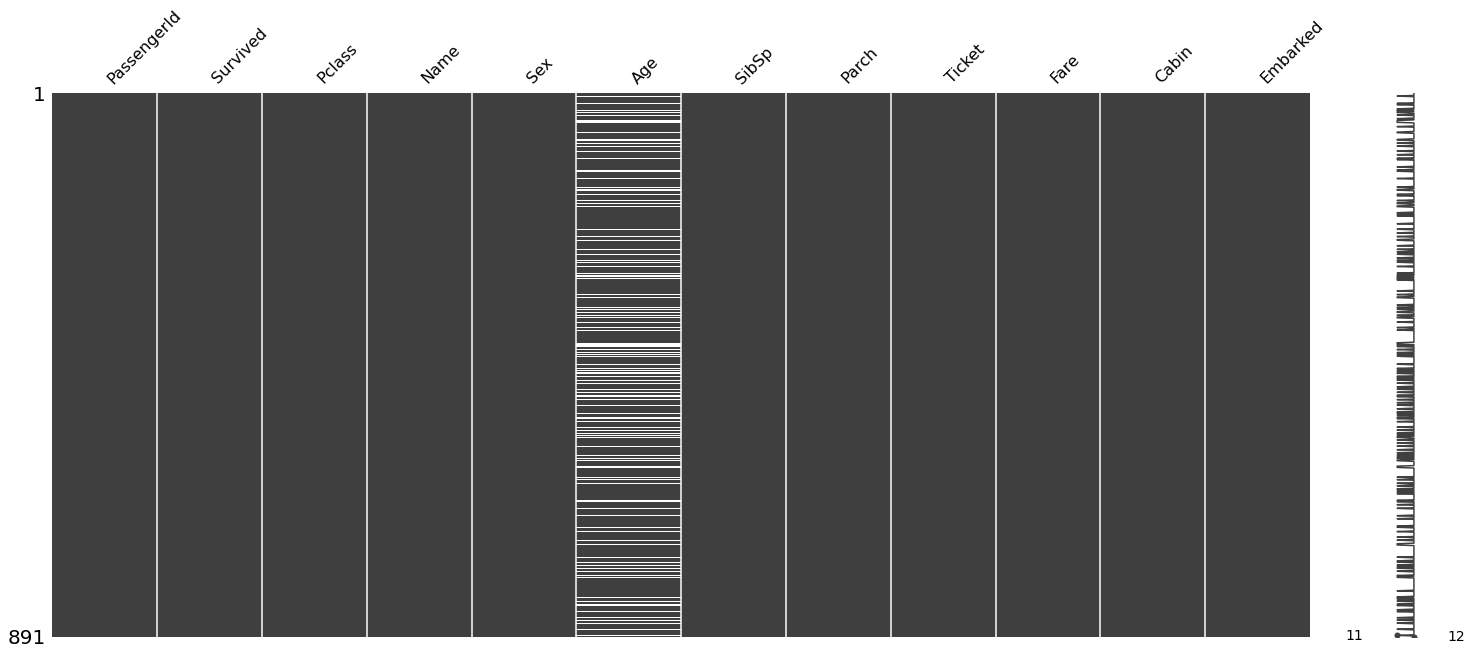

In [8]:
msno.matrix(df)

In [9]:
# Classement des variables selon leur taux de NaN
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_analyse_nan = df.isnull().sum(axis = 0)/df.shape[0]
df_analyse_nan.sort_values(ascending=False)

Age           0.199
PassengerId   0.000
Survived      0.000
Pclass        0.000
Name          0.000
Sex           0.000
SibSp         0.000
Parch         0.000
Ticket        0.000
Fare          0.000
Cabin         0.000
Embarked      0.000
dtype: float64

In [10]:
# Classement des variables selon leur taux de NaN
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_analyse_nan = df_test.isnull().sum(axis = 0)/df_test.shape[0]
df_analyse_nan.sort_values(ascending=False)

Age           0.206
Fare          0.002
PassengerId   0.000
Pclass        0.000
Name          0.000
Sex           0.000
SibSp         0.000
Parch         0.000
Ticket        0.000
Cabin         0.000
Embarked      0.000
dtype: float64

In [11]:
#df = df.dropna(axis=0, how='any', subset=[''])
df[['Age']] = df[['Age']].fillna(df['Age'].mean())
df_test[['Age']] = df_test[['Age']].fillna(df_test['Age'].mean())
df_test[['Fare']] = df_test[['Fare']].fillna(df_test['Fare'].mean())


<AxesSubplot:>

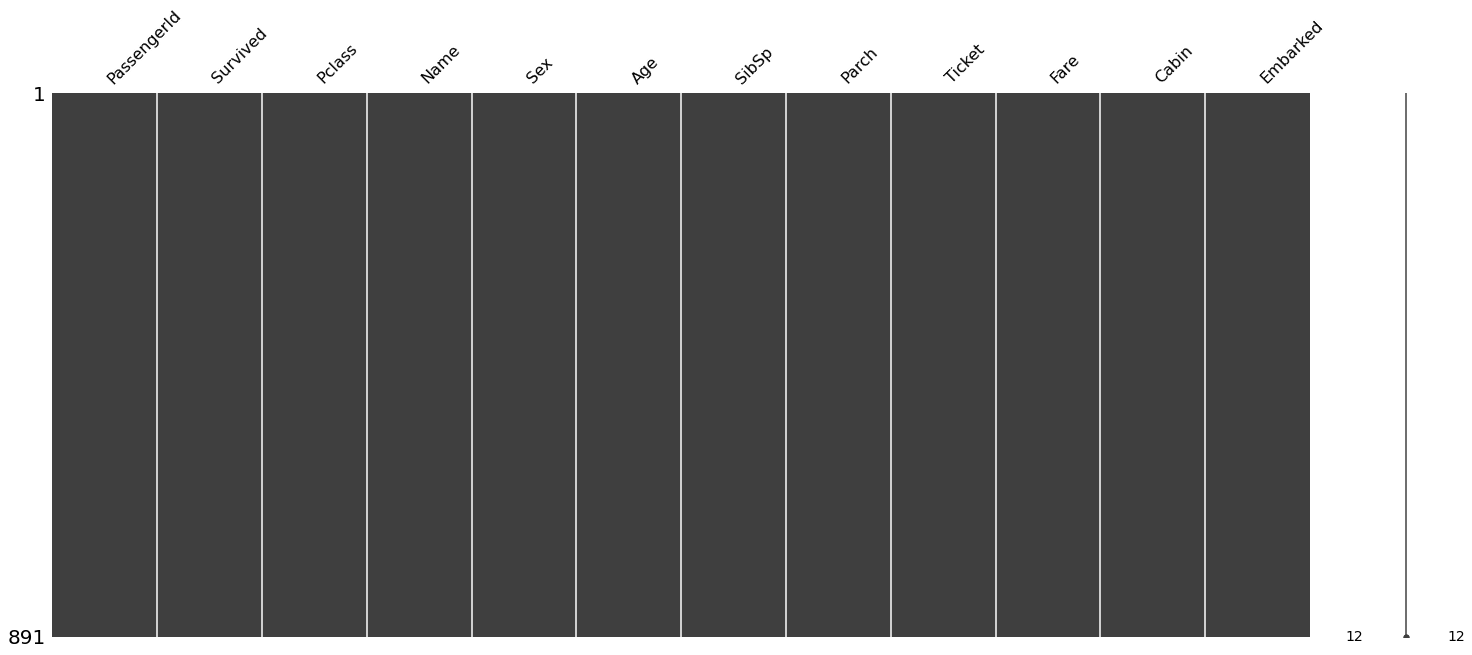

In [12]:
# Vérification visuelle du nettoyage
msno.matrix(df)

<AxesSubplot:>

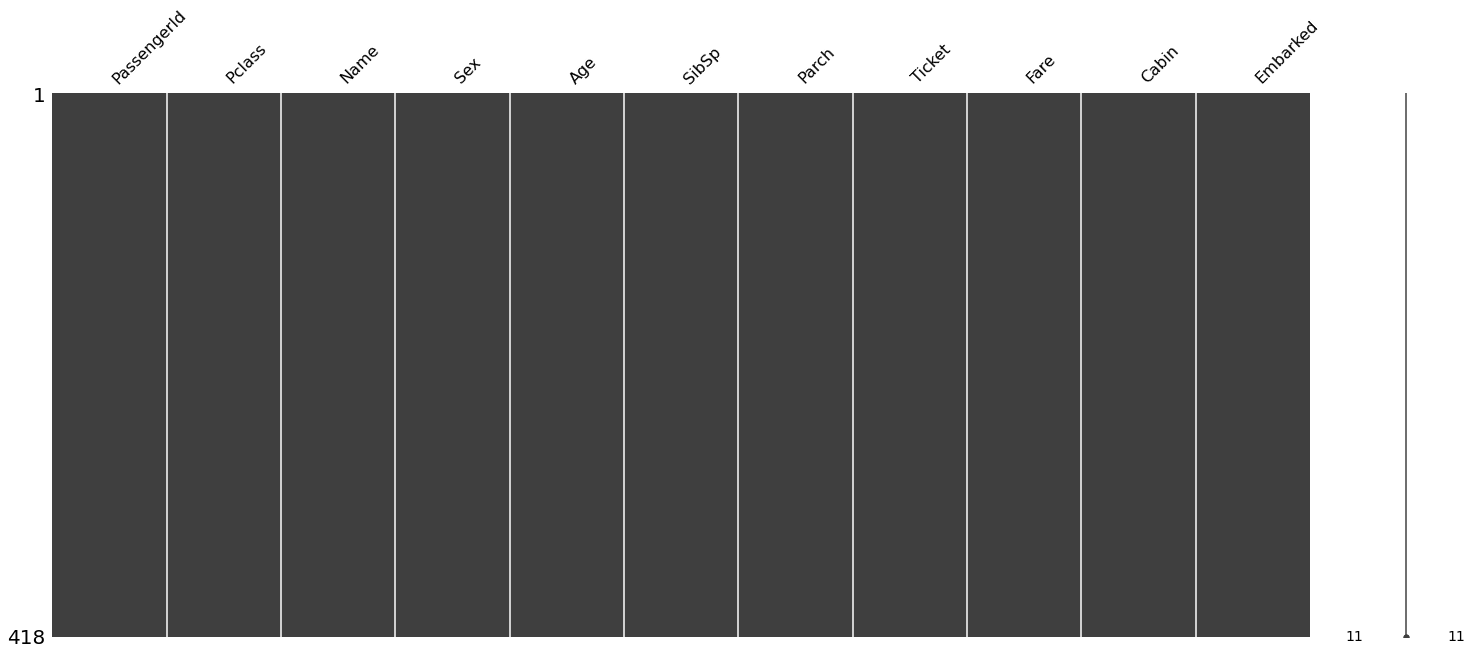

In [13]:
msno.matrix(df_test)

### Preprocessing

In [14]:
#df = df.dropna()
#df_test = df_test.dropna()

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,,S


### Visualisations et statistiques

In [16]:
#liste des variables qualitatives
list=df.select_dtypes(include=['object']).columns
print(list)
#Dans un dataset, nous plaçons uniquement les variables qualitatives.
cat_data= df.select_dtypes(include='O')
cat_data.head(5)
# Analyse des variables catégorielles:

print(cat_data['Sex'].value_counts())

print(cat_data['Cabin'].value_counts())

print(cat_data['Cabin'].map(lambda x:x[0:1]).value_counts())

print(cat_data['Embarked'].value_counts())

print(cat_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()).value_counts())

print(cat_data['Ticket'].apply(lambda x:len(x)).value_counts())

print(cat_data['Ticket'].apply(lambda x:x[0:2]).value_counts())

print(cat_data['Ticket'].apply(lambda x:len(x)).value_counts())

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
male      577
female    314
Name: Sex, dtype: int64
               687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
     687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64
S    644
C    168
Q     77
       2
Name: Embarked, dtype: int64
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64
6     419
5     131
4     101
8      76
10     41
7      27
9      26
17     14
16     11
13 

In [17]:
df1 = cat_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()).value_counts()
liste1=df1.head(6).index.tolist()
print(liste1)

df2 = cat_data['Ticket'].apply(lambda x:x[0:2]).value_counts()
liste2=df2.head(27).index.tolist()
print(liste2)


['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev']
['34', '11', 'PC', '26', '36', '31', '23', '24', 'C.', '35', '37', 'A/', 'SO', 'ST', '19', '33', 'SC', 'S.', '25', '29', 'CA', '17', '28', '13', 'W.', '38', '16']


In [18]:
#liste des variables qualitatives
list=df_test.select_dtypes(include=['object']).columns
print(list)
#Dans un dataset, nous plaçons uniquement les variables qualitatives.
cat_data_test= df_test.select_dtypes(include='O')
cat_data_test.head(5)
# Analyse des variables catégorielles:

print(cat_data_test['Sex'].value_counts())

print(cat_data_test['Cabin'].value_counts())

print(cat_data_test['Cabin'].map(lambda x:x[0:1]).value_counts())

print(cat_data_test['Embarked'].value_counts())

print(cat_data_test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()).value_counts())

print(cat_data_test['Ticket'].apply(lambda x:len(x)).value_counts())


print(cat_data_test['Ticket'].apply(lambda x:x[0:2]).value_counts())

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')
male      266
female    152
Name: Sex, dtype: int64
                   327
B57 B59 B63 B66      3
C89                  2
C116                 2
C80                  2
                  ... 
E45                  1
E52                  1
B58 B60              1
C62 C64              1
C105                 1
Name: Cabin, Length: 77, dtype: int64
     327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64
S    270
C    102
Q     46
Name: Embarked, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name, dtype: int64
6     183
5      62
4      47
8      42
10     22
9      11
11     10
7       9
13      9
18      8
12      6
15      3
3       2
16      2
17      2
Name: Ticket, dtype: int64
34    48
11    37
26    35
PC    32
36    19
C.    19
24    16
23    15
35    14
33    14
31    14
SC    

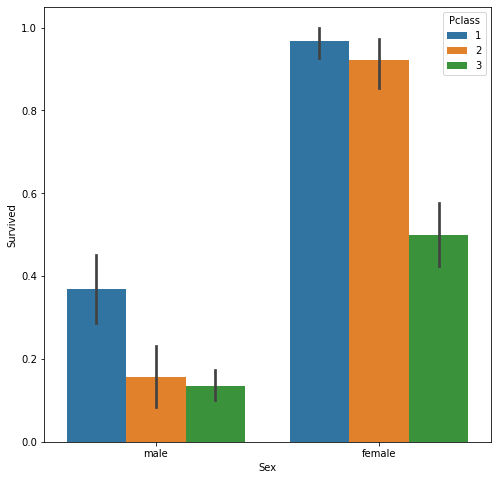

In [19]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df)
plt.show()

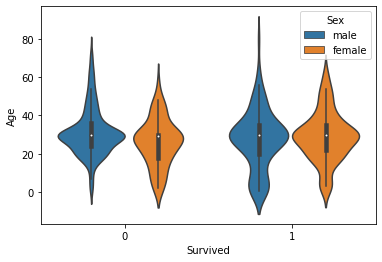

In [20]:
sns.violinplot(x="Survived", y="Age", hue='Sex', data=df)
plt.show()

C:\Users\paulj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


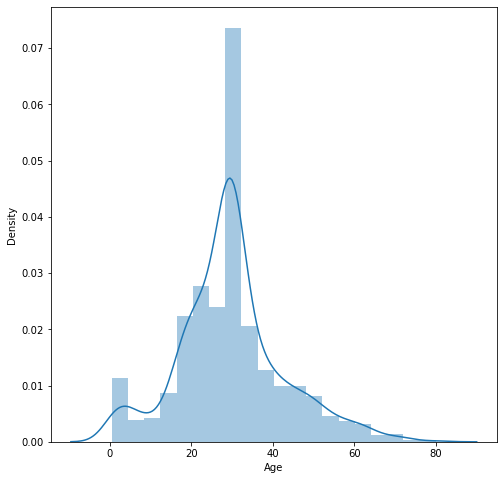

In [21]:
plt.figure(figsize=(8,8))
sns.distplot(df['Age'],bins=20)
plt.show()

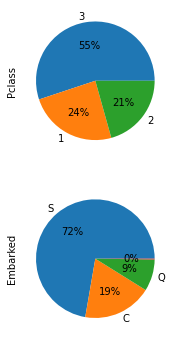

In [22]:
#print(df.groupby('Pclass').sum()['Survived'])
#print(df.groupby('Embarked').sum()['Survived'])
fig=plt.figure(figsize=(6,6))
plt.subplot(211)
df['Pclass'].value_counts().plot.pie(y='Pclass', autopct='%1.0f%%')
plt.subplot(212)
df['Embarked'].value_counts().plot.pie(y='Embarked', autopct='%1.0f%%')
plt.show()

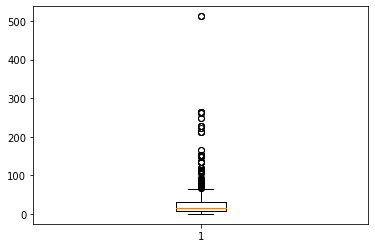

In [23]:
plt.boxplot(df.Fare)
plt.show()

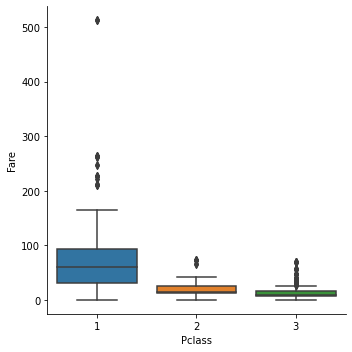

In [24]:
sns.catplot(x = 'Pclass', y ='Fare',kind='box',data = df)
plt.show()

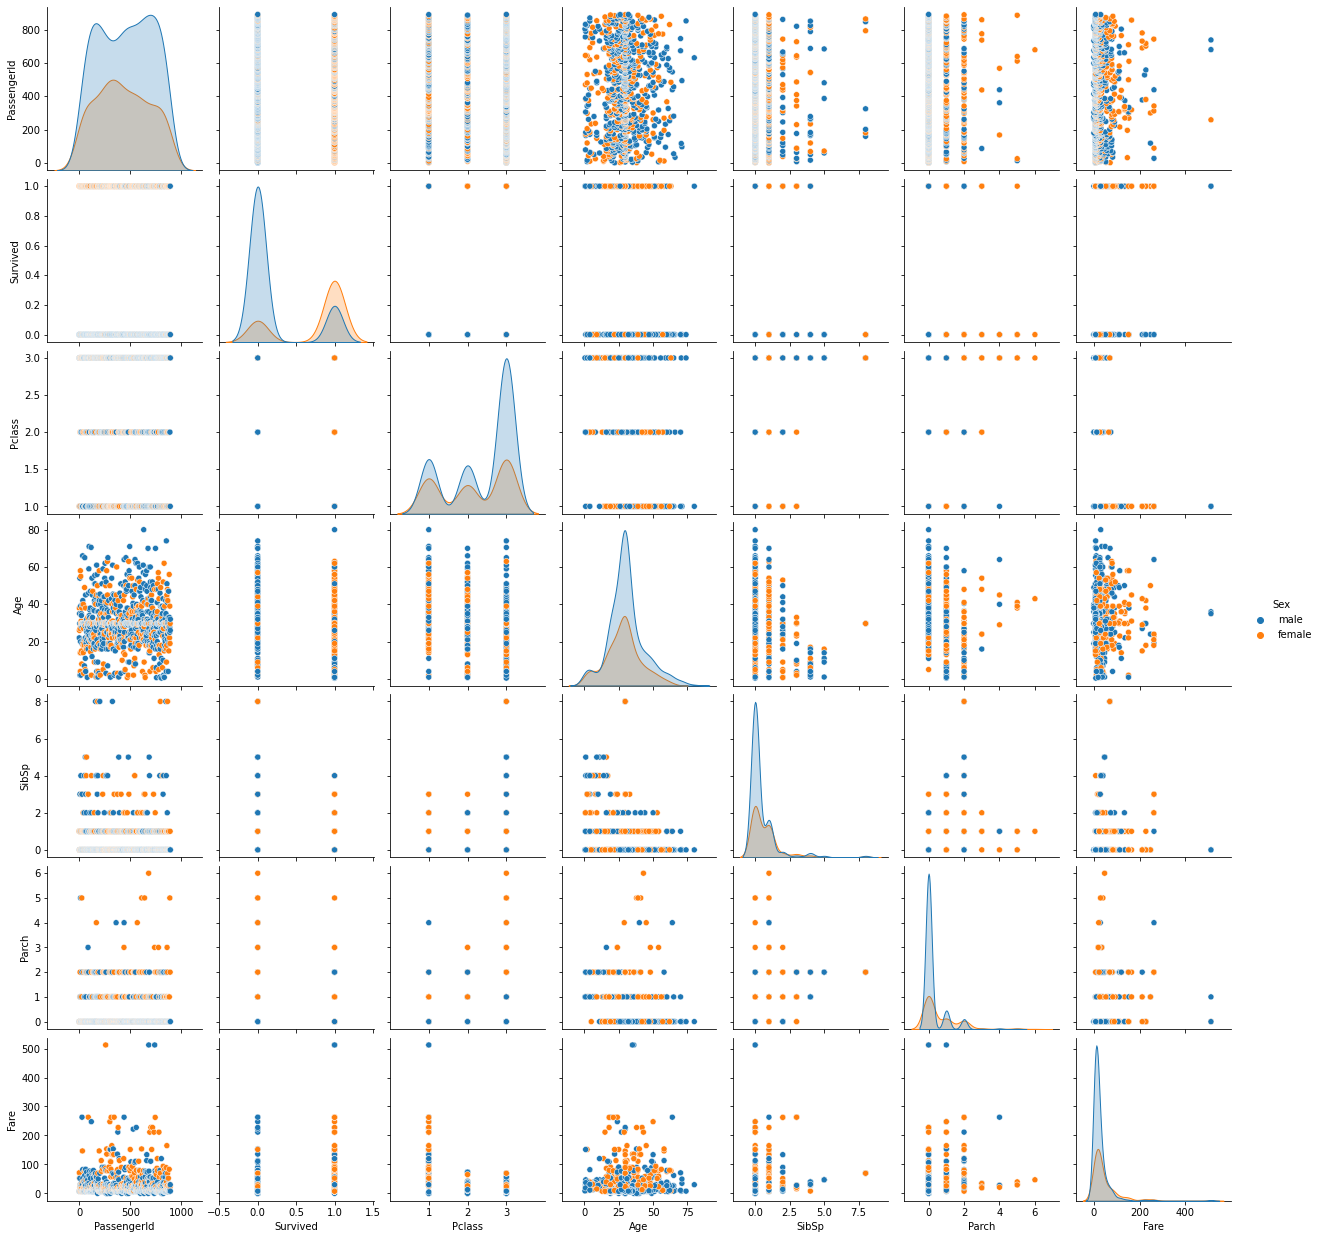

In [25]:
sns.pairplot(df,hue ='Sex')
plt.show()

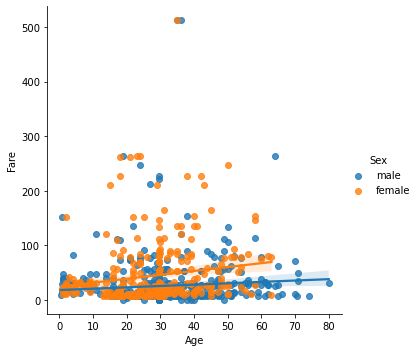

In [26]:
sns.lmplot(x='Age',y='Fare',hue='Sex', data = df)
plt.show()

<AxesSubplot:>

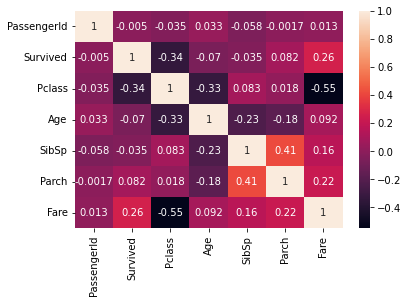

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(df.corr(),annot=True)

### Suite du Preprocessing

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])

In [29]:
df['Cabin'] =df['Cabin'].map(lambda x:x[0:1])
df_test['Cabin'] =df_test['Cabin'].map(lambda x:x[0:1])

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000,1,0,A/5 21171,7.250,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000,1,0,PC 17599,71.283,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000,0,0,STON/O2. 3101282,7.925,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000,1,0,113803,53.100,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000,0,0,373450,8.050,,S


In [31]:
df['Name']=df['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
df_test['Name']=df_test['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [32]:

df['Ticket_len']=df['Ticket'].map(lambda x:len(x))
df_test['Ticket_len']=df_test['Ticket'].map(lambda x:len(x))
                                            
df['Ticket']=df['Ticket'].map(lambda x:x[0:2])
df_test['Ticket']=df_test['Ticket'].map(lambda x:x[0:2])
                                            

In [33]:
df1 = cat_data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip()).value_counts()
liste1=df1.head(6).index.tolist()
print(liste1)

df2 = cat_data['Ticket'].apply(lambda x:x[0:2]).value_counts()
liste2=df2.head(27).index.tolist()
print(liste2)

['Mr', 'Miss', 'Mrs', 'Master', 'Dr', 'Rev']
['34', '11', 'PC', '26', '36', '31', '23', '24', 'C.', '35', '37', 'A/', 'SO', 'ST', '19', '33', 'SC', 'S.', '25', '29', 'CA', '17', '28', '13', 'W.', '38', '16']


In [34]:
def fonc1(x):
    if x not in liste1:
        return 'Others'
    else:
        return x
    
def fonc2(x):
    if x not in liste2:
        return 'ZZ'
    else:
        return x
    

df['Name']=df['Name'].apply(lambda x:fonc1(x))
df['Ticket']=df['Ticket'].apply(lambda x:fonc2(x))

df_test['Name']=df_test['Name'].apply(lambda x:fonc1(x))
df_test['Ticket']=df_test['Ticket'].apply(lambda x:fonc2(x))

In [35]:
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [36]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_len,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Name_Rev,Ticket_11,Ticket_13,Ticket_16,Ticket_17,Ticket_19,Ticket_23,Ticket_24,Ticket_25,Ticket_26,Ticket_28,Ticket_29,Ticket_31,Ticket_33,Ticket_34,Ticket_35,Ticket_36,Ticket_37,Ticket_38,Ticket_A/,Ticket_C.,Ticket_CA,Ticket_PC,Ticket_S.,Ticket_SC,Ticket_SO,Ticket_ST,Ticket_W.,Ticket_ZZ,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.000,1,0,7.250,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,1,0,38.000,1,0,71.283,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,3,0,26.000,0,0,7.925,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,4,1,1,0,35.000,1,0,53.100,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5,0,3,1,35.000,0,0,8.050,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_len,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Name_Rev,Ticket_11,Ticket_13,Ticket_16,Ticket_17,Ticket_19,Ticket_23,Ticket_24,Ticket_25,Ticket_26,Ticket_28,Ticket_29,Ticket_31,Ticket_33,Ticket_34,Ticket_35,Ticket_36,Ticket_37,Ticket_38,Ticket_A/,Ticket_C.,Ticket_CA,Ticket_PC,Ticket_S.,Ticket_SC,Ticket_SO,Ticket_ST,Ticket_W.,Ticket_ZZ,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.500,0,0,7.829,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,893,3,0,47.000,1,0,7.000,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,894,2,1,62.000,0,0,9.688,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,895,3,1,27.000,0,0,8.662,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,896,3,0,22.000,1,1,12.287,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [38]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Ticket_len', 'Name_Dr', 'Name_Master', 'Name_Miss', 'Name_Mr',
       'Name_Mrs', 'Name_Others', 'Name_Rev', 'Ticket_11', 'Ticket_13',
       'Ticket_16', 'Ticket_17', 'Ticket_19', 'Ticket_23', 'Ticket_24',
       'Ticket_25', 'Ticket_26', 'Ticket_28', 'Ticket_29', 'Ticket_31',
       'Ticket_33', 'Ticket_34', 'Ticket_35', 'Ticket_36', 'Ticket_37',
       'Ticket_38', 'Ticket_A/', 'Ticket_C.', 'Ticket_CA', 'Ticket_PC',
       'Ticket_S.', 'Ticket_SC', 'Ticket_SO', 'Ticket_ST', 'Ticket_W.',
       'Ticket_ZZ', 'Cabin_', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [39]:
df_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Ticket_len', 'Name_Dr', 'Name_Master', 'Name_Miss', 'Name_Mr',
       'Name_Mrs', 'Name_Others', 'Name_Rev', 'Ticket_11', 'Ticket_13',
       'Ticket_16', 'Ticket_17', 'Ticket_19', 'Ticket_23', 'Ticket_24',
       'Ticket_25', 'Ticket_26', 'Ticket_28', 'Ticket_29', 'Ticket_31',
       'Ticket_33', 'Ticket_34', 'Ticket_35', 'Ticket_36', 'Ticket_37',
       'Ticket_38', 'Ticket_A/', 'Ticket_C.', 'Ticket_CA', 'Ticket_PC',
       'Ticket_S.', 'Ticket_SC', 'Ticket_SO', 'Ticket_ST', 'Ticket_W.',
       'Ticket_ZZ', 'Cabin_', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [40]:
# dernier ajustement
# ajout pour que ça colle avec le jeu de train
df_test['Cabin_T']=0
df_test['Embarked_']=0
df_test=df_test.reindex(columns=df.drop('Survived',axis=1).columns)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_len,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Name_Rev,Ticket_11,Ticket_13,Ticket_16,Ticket_17,Ticket_19,Ticket_23,Ticket_24,Ticket_25,Ticket_26,Ticket_28,Ticket_29,Ticket_31,Ticket_33,Ticket_34,Ticket_35,Ticket_36,Ticket_37,Ticket_38,Ticket_A/,Ticket_C.,Ticket_CA,Ticket_PC,Ticket_S.,Ticket_SC,Ticket_SO,Ticket_ST,Ticket_W.,Ticket_ZZ,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.500,0,0,7.829,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,893,3,0,47.000,1,0,7.000,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,894,2,1,62.000,0,0,9.688,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,895,3,1,27.000,0,0,8.662,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,896,3,0,22.000,1,1,12.287,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
print(df.drop('Survived',axis=1).columns)
print(df_test.columns)
print(df.shape)
print(df_test.shape)

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Ticket_len', 'Name_Dr', 'Name_Master', 'Name_Miss', 'Name_Mr',
       'Name_Mrs', 'Name_Others', 'Name_Rev', 'Ticket_11', 'Ticket_13',
       'Ticket_16', 'Ticket_17', 'Ticket_19', 'Ticket_23', 'Ticket_24',
       'Ticket_25', 'Ticket_26', 'Ticket_28', 'Ticket_29', 'Ticket_31',
       'Ticket_33', 'Ticket_34', 'Ticket_35', 'Ticket_36', 'Ticket_37',
       'Ticket_38', 'Ticket_A/', 'Ticket_C.', 'Ticket_CA', 'Ticket_PC',
       'Ticket_S.', 'Ticket_SC', 'Ticket_SO', 'Ticket_ST', 'Ticket_W.',
       'Ticket_ZZ', 'Cabin_', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D',
       'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Embarked_', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Ticket_len', 'Name_Dr', 'Name_Master', 'Name_Miss', 'Name_Mr',
       'Name_Mrs', 'Name_Others', 'Name_Rev', 'Ticket_11', 'Ticket_13',


In [42]:
# Sauvegarde du dataframe "clean" afin de pouvoir le réutiliser dans les notebook suivants
df = df.set_index('PassengerId')
df.to_csv('train_2.csv')

In [43]:
# Vérification sauvegarde / chargement
df_verif = pd.read_csv('train_2.csv', index_col='PassengerId')
print('Dimensions dataset chargé :', df_verif.shape)
df_verif.head()

Dimensions dataset chargé : (891, 56)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_len,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Name_Rev,Ticket_11,Ticket_13,Ticket_16,Ticket_17,Ticket_19,Ticket_23,Ticket_24,Ticket_25,Ticket_26,Ticket_28,Ticket_29,Ticket_31,Ticket_33,Ticket_34,Ticket_35,Ticket_36,Ticket_37,Ticket_38,Ticket_A/,Ticket_C.,Ticket_CA,Ticket_PC,Ticket_S.,Ticket_SC,Ticket_SO,Ticket_ST,Ticket_W.,Ticket_ZZ,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.000,1,0,7.250,9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,0,38.000,1,0,71.283,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,1,3,0,26.000,0,0,7.925,16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,0,35.000,1,0,53.100,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,0,3,1,35.000,0,0,8.050,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
# Sauvegarde du dataframe "clean" afin de pouvoir le réutiliser dans les notebook suivants

df_test = df_test.set_index('PassengerId')
df_test.to_csv('test_2.csv')
# Vérification sauvegarde / chargement
df_verif = pd.read_csv('test_2.csv', index_col='PassengerId')
print('Dimensions dataset chargé :', df_verif.shape)
df_verif.head()

Dimensions dataset chargé : (418, 55)


,Pclass,Sex,Age,SibSp,Parch,Fare,Ticket_len,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Others,Name_Rev,Ticket_11,Ticket_13,Ticket_16,Ticket_17,Ticket_19,Ticket_23,Ticket_24,Ticket_25,Ticket_26,Ticket_28,Ticket_29,Ticket_31,Ticket_33,Ticket_34,Ticket_35,Ticket_36,Ticket_37,Ticket_38,Ticket_A/,Ticket_C.,Ticket_CA,Ticket_PC,Ticket_S.,Ticket_SC,Ticket_SO,Ticket_ST,Ticket_W.,Ticket_ZZ,Cabin_,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Embarked_,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
892,3,1,34.500,0,0,7.829,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
893,3,0,47.000,1,0,7.000,6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
894,2,1,62.000,0,0,9.688,6,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
895,3,1,27.000,0,0,8.662,6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
896,3,0,22.000,1,1,12.287,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
